Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

If a variable is given to you, give your answer to that variable. In case of multiple choice questions, answer to the given variable. Make sure your variable has a **string value** and it contains only the letter of your choice. For example if you think that choice b is the correct choice, and the given variable is answer, your answer should look like this:

answer = 'b'

or 

answer = 'B'

If you need to read a file for a task, datafiles, such as .csv or .txt files are found in data subfolder. This can be accessed using data/filename.extension. In case of image, they are found in subfolder images. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Kalpani Kammangoda Mudalige"

---

# Multi-Modal Data Fusion - Exercise 2: Common representation


## Learning goals

After this exercise, you should
  
- be able to implement PCA on your own and use it from sklearn
- be able to implement LDA algorithm
- be able to implement bootstrapping algorithm
- know how to apply (Gradient) Boosting algorithm for classification problem



## Relevant lecture

Lecture 3.

## Relevant chapters in course book

Chapter 4.

## Additional material

- Scikit-learn https://scikit-learn.org/stable/
- Pandas https://pandas.pydata.org/docs/
- numpy https://numpy.org/doc/stable/

# Assignments

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 1: Bootstrapping</b>

<p>Implement bootstrapping (see Lecture 3) to the function stub below. You may assume that D is the dataset given as Python list. M is the number of resamples drawn and N is the number of observations in the original dataset. The function should return MxN matrix where each row contains one bootstrapped sample. 
    
Use of numpy is recommended, especially size() and tile(). Try to use as few for loops as possible.</p>

</div>

In [2]:
import numpy as np

def bootstrap(D,M):
    # Implement here
    np.random.seed(0) #Do not change or remove
    # YOUR CODE HERE
    import random
    resamples = np.tile(D, (M,1))
    
    for idx in range(M): 
        randomlist = []
        for i in range(len(D)):
            n = random.randint(min(D),max(D))
            randomlist.append(n)

        resamples[idx] = randomlist
        
    return resamples

In [3]:
# Your points for the Problem 1 will be given in this cell. Dont modify it.

Sample usage of the bootstrapping algorithm.

In [4]:
D = [1, 2, 3, 4, 5, 6, 7, 8, 9,10]
bootstrap(D,3)

array([[10,  9,  5,  7,  4,  2, 10,  9,  2,  7],
       [ 4,  4,  8,  1,  3,  6,  1,  4,  8,  7],
       [ 5,  8,  2,  2,  5,  9,  5,  7,  1,  6]])

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 2: PCA</b>

<p>Implement PCA algorithm as described in Lecture 3. Use data from pca_data.csv. Compute $\mu$ and $\Sigma$ as explained in lecture slides. Find eigenvalues and eigenvectors of $\Sigma$. Pick the first principal component which corresponds to largest eigenvalue. Plot the data and first principal component in same figure. The line depicting the first principal component should start from mean $\mu$ and end in $\mu\pm u_1$, where $u_1$ is the first principal component.</p>
    
<b>Remember to save results to following variables:</b>
  <ul style="margin-top:-5px;">
    <li>mu</li>
    <li>sigma</li>
    <li>U</li>
     <li>V</li>
    <li>vec1</li>
    <li>vec2</li>
  </ul>

</div>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

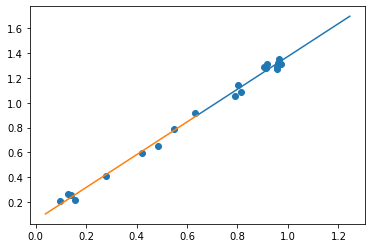

In [6]:
# YOUR CODE HERE
import pandas as pd

data = np.genfromtxt('data/pca_data.csv', delimiter=',')
#print(data)

data_mean = sum(data)/len(data)
#print(data_mean)

data_centered = data - data_mean
#print(data_centered)

covariance = np.dot(np.transpose(data_centered),data_centered) / len(data_centered)
#print(covariance)

eigen_values , eigen_vectors = np.linalg.eigh(covariance) #eigenvalues and eigenvectors

# print(eigen_values)
# print(eigen_vectors)

idx_maxval = list(eigen_values).index(max(eigen_values)) #index of the max eigen value
# print(idx_maxval)

pca1 = eigen_vectors[idx_maxval]
#print(pca1)

#plotting
plt.scatter(data[:,0], data[:,1])

plt.plot([data_mean[0], data_mean[0] + pca1[0]], [data_mean[1], data_mean[1] + pca1[1]]) #mu + u

plt.plot([data_mean[0], data_mean[0] - pca1[0]], [data_mean[1], data_mean[1] - pca1[1]]) #mu - u


mu = data_mean
sigma = covariance
U = eigen_values #Eigenvalues
V = eigen_vectors #Eigenvectors
vec1 = data_mean + pca1 #mu + u
vec2 = data_mean - pca1 #mu - u

In [7]:
# Your points for the mean calculation will be given in this cell. Do not modify it.

In [8]:
# Your points for the sigma calculation will be given in this cell. Do not modify it.

In [9]:
# Your points for the eigen vectors calculation will be given in this cell. Do not modify it.

In [10]:
# Your points for the eigen values calculation will be given in this cell. Do not modify it.

In [11]:
# Your points for the vec1 and vec2 calculation will be given in this cell. Do not modify it

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 3: PCA using sklearn</b>

<p>Consult documentation of sklearn on how to perform PCA using sklearn. Perform PCA using sklearn on same dataset as in Problem 2. Pick the model and train it (fit it) using same data as above.  Save first principal component to components variable (hint: its the components_ attribute of the pca object).

Do you get the same results? If not, what might be a reason for it?</p>


    
</div>

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
# YOUR CODE HERE
pca.fit_transform(data)
#print(pca.components_)

components = pca.components_

In [13]:
# Your points for the Problem 3 will be given in this cell. Dont modify it.

#### Compare results from Problem 2, and 3. Do you get the same results? If not, what might be a reason for it?


I got same values but with different signs (Positive and Negative). To get the same sign we need to adapt same normalization  mechanism that sklearn does.

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 4: LDA</b>

<p>Implement LDA algorithm as described in Lecture 3. Use data from lda_data.csv. The data consists of x coordinate, y coordinate and class label (0 or 1). Compute the quantities appearing in lecture slides. The LDA projection operator $U$ consists of single column which is the eigenvector of $H$ corresponding to the largest eigenvalue. Plot the data points with different colors for each class and the LDA subspace (line) in same figure. The line depicting the LDA subspace should start from mean $\mu_G$ and end in $\mu_G\pm u$, where $u$ is the direction of LDA subspace.</p>

<b>Remember to save results to following variables:</b>
  <ul style="margin-top:-5px;">
    <li>mu0, mu1, muG</li>
    <li>sigma0, sigma1</li>
     <li>sigmaW, sigmaB</li>
    <li>H, U, V, u</li>
    <li>vec1, vec2</li>
  </ul>

</div>

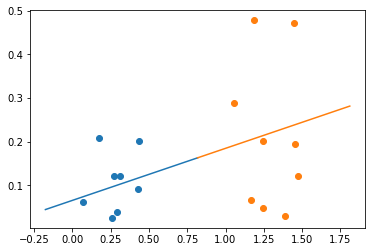

In [14]:
# See Lecture 3 notes 

# YOUR CODE HERE
def split(arr, cond):
    return [arr[cond], arr[~cond]]

data_lda = np.genfromtxt('data/lda_data.csv', delimiter=',')

class0, class1 = split(data_lda, data_lda[:,2]==0)

# print(class0)
# print(class1)

nk_0 = len(class0)
nk_1 = len(class1)

mu_0 = np.mean(class0[:, [0,1]], axis=0)
mu_1 = np.mean(class1[:, [0,1]], axis=0)

centered0 = class0[:, [0,1]] - mu_0
centered1 = class1[:, [0,1]] - mu_1

sigma_0 = np.dot(np.transpose(centered0), centered0) / nk_0
sigma_1 = np.dot(np.transpose(centered1), centered1) / nk_1

N = len(data_lda)
#print(N)

mu_G = ((nk_0*mu_0) + (nk_1*mu_1))/N
#print(mu_G)


sigma_W = ((nk_0*sigma_0) + (nk_1*sigma_1))/N
#print(sigma_W)

sigma_B = (nk_0 * (np.matrix(mu_0 - mu_G).T) * (mu_0 - mu_G) + nk_1 * (np.matrix(mu_1-mu_G).T) * (mu_1-mu_G))/N
#print(sigma_B)

H = np.linalg.inv(sigma_W)*(sigma_B)

h_eigen_values,h_eigen_vectors =  np.linalg.eigh(H)
# print(h_eigen_values)
# print(h_eigen_vectors)

idx_maxval = list(h_eigen_values).index(max(h_eigen_values)) #index of the max eigen value
# print(idx_maxval)

u = h_eigen_vectors[idx_maxval]
#print(u)

plt.scatter(class0[:,0], class0[:,1])
plt.scatter(class1[:,0], class1[:,1])

#plotting
plt.plot([mu_G[0], mu_G[0] + u[0,0]], [mu_G[1], mu_G[1] + u[0,1]])
plt.plot([mu_G[0], mu_G[0] - u[0,0]], [mu_G[1], mu_G[1] - u[0,1]])

mu0 = mu_0 
mu1 = mu_1
muG = mu_G

sigma0 = sigma_0
sigma1 = sigma_1
sigmaW = sigma_W
sigmaB = sigma_B


H = H

U = eigen_values #Eigenvalues
V = eigen_vectors #Eigenvectors
u = u

vec1 = muG + u #muG + u
vec2 = muG - u #muG - u

In [15]:
# Your points for the mean calculations will be given in this cell. Dont modify it.

In [16]:
# Your points for the sigma calculations will be given in this cell. Dont modify it.

In [17]:
# Your points for the H matrix calculation will be given in this cell. Dont modify it.

In [18]:
# Your points for the eigen values calculation will be given in this cell. Dont modify it.

In [19]:
# Your points for the eigen vectors calculation will be given in this cell. Dont modify it.

In [20]:
# Your points for the vec_1 and vec_2 calculations will be given in this cell. Dont modify it.

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 5: Boosting</b>

<p>Use the tab-separated(!) file wifi_localization.txt. The data allows to determine indoor room location from wifi signal strenghts. Last column of the file contains class labels of rooms while the first seven columns contains signal strengths of mobile phones. Split the dataset into training (70%), validation (15%) and testing sets (15%). Train GradientBoostingClassifier from sklearn using n_estimators between 1-40. Consult documentation of sklearn (or Google) on how to do this. Compute the validation score on validation set using score(). Plot scores against n. Pick the value for n giving highest score and train the model using training data. If there are multiple n with same (highest) score, choose the smallest n. For that n, plot confusion matrix for testing set.</p>

<p>Use random_state = 0 in all functions that have random_state as a parameter (train_test_split and GradientBoostingClassifier). Do not change learning rate, or give learning_rate = 0.1 as a parameter.</p>
    
<b>Remember to save results to following variables:</b>
  <ul style="margin-top:-5px;">
    <li>scores</li>
    <li>best_score</li>
     <li>ypred</li>
    <li>matrix</li>
  </ul>
</div>

/opt/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


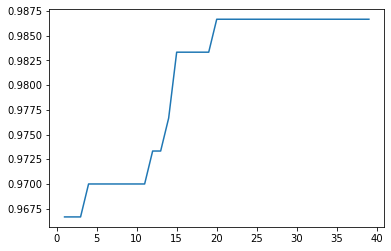

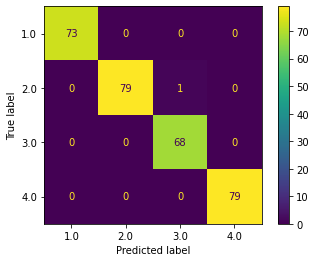

In [21]:
#Use random_state = 0 in all functions with that parameter

# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

d_wifi = np.genfromtxt('data/wifi_localization.txt', delimiter = '\t')
labels = d_wifi[:,-1]

d_wifi = np.delete(d_wifi, -1, 1)

wifi_train, wifi_test, wifi_train_labels, wifi_test_labels = train_test_split(d_wifi, labels, random_state = 0, train_size=0.7)

wifi_valid, wifi_test, wifi_valid_labels, wifi_test_labels = train_test_split(wifi_test,wifi_test_labels,random_state = 0, test_size=0.5)


validation_scores = []
for estimator in range(1,40):
    model = GradientBoostingClassifier(n_estimators=estimator, learning_rate=0.1,random_state=0)
    model.fit(wifi_train, wifi_train_labels)
    train_pred = model.predict(wifi_train)
    validation_scores.append((estimator,model.score(wifi_valid, wifi_valid_labels)))

best_validation_score = sorted(validation_scores,key=lambda x: x[1], reverse=True)[0]

#print(best_validation_score[0])

score_values = []
n = []
for i in validation_scores:
    n.append(i[0])
    score_values.append(i[1])
    
plt.plot(n,score_values) #plot scores and n values

scores = score_values # Array of size 39 (range 1-40) with score values. For index i score is calculated with n_estimators=i
best_score = best_validation_score[0] # The index (n_estimators) of scores with the largest value (If several, choose smallest n)

# Create new gradient boosting classifier with n_estimators = best_score
GBClassifier = GradientBoostingClassifier(n_estimators=best_score, learning_rate=0.1,random_state=0)
ypred = GBClassifier.fit(wifi_test, wifi_test_labels)# Predict class for test set 
matrix = metrics.plot_confusion_matrix(GBClassifier, wifi_test, wifi_test_labels) # Confusion matrix for testing set

In [22]:
# Your points for the Problem 5 confusion matrix will be given in this cell. Dont modify it.

In [23]:
# Your points for the Problem 5 predictions will be given in this cell. Dont modify it.

In [24]:
# Your points for the Problem 5 scores will be given in this cell. Dont modify it.

In [25]:
# Your points for the Problem 5 best score will be given in this cell. Dont modify it.